In [112]:
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\musaq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
def add_words_to_list(words_path):
    index_file_path = os.path.join(words_path, 'index.json')

    with open(index_file_path) as f:
        all_files = json.load(f)

    for file_data in all_files['files']:
        new_path = os.path.join(words_path, file_data['filename'])

        with open(new_path, encoding='utf-8') as f:
            words_json = json.load(f)
            for word in words_json['translations']:
                all_words.append(word)

In [91]:
all_words = []

add_words_to_list(os.path.join('arabic', 'words'))

print(f'Total number of words are: {len(all_words)}')

Total number of words are: 1161


In [92]:
english_words = [d['english'].lower().strip() for d in all_words if 'english' in d]

In [93]:
word2vec_model = KeyedVectors.load_word2vec_format('models/GoogleNews-vectors-negative300.bin', binary=True)

In [94]:
stop_words = set(stopwords.words('english'))
english_words = [word for word in english_words if word not in stop_words and word in word2vec_model]

In [95]:
word_vectors = [word2vec_model[word] for word in english_words]

## K MEANS

In [29]:
num_clusters = 25

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word_vectors)
cluster_labels = kmeans.labels_

In [30]:
clusters = {}
for word, label in zip(english_words, cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(word)

In [31]:
for cluster_num, words in clusters.items():
    print(f"Cluster {cluster_num}: {words}")

Cluster 10: ['absence', 'age', 'air', 'almost', 'also', 'amount', 'army', 'around', 'available', 'back', 'basic', 'become', 'beginning', 'belt', 'break', 'brush', 'camera', 'cancellation', 'charity', 'cheap', 'choice', 'circle', 'clean', 'clear', 'cloud', 'come', 'comparison', 'control', 'corner', 'correct', 'cost', 'cover', 'cup', 'danger', 'death', 'delivery', 'detail', 'disaster', 'discount', 'dust', 'early', 'empty', 'end', 'energy', 'especially', 'even', 'every', 'example', 'face', 'far', 'fat', 'fight', 'first', 'flat', 'football', 'fork', 'free', 'full', 'future', 'generally', 'guest', 'heavy', 'high', 'history', 'home', 'hot', 'inside', 'international', 'jewelry', 'key', 'last', 'late', 'later', 'left', 'length', 'level', 'lie', 'life', 'limit', 'line', 'list', 'low', 'make', 'many', 'map', 'market', 'million', 'mirror', 'nature', 'need', 'new', 'noise', 'notebook', 'number', 'often', 'oil', 'one', 'opposite', 'part', 'party', 'past', 'penny', 'people', 'percentage', 'photo', '

## COSINE SIMILARITY

In [ ]:
similarity_matrix = cosine_similarity(word_vectors)

Version 1

In [121]:
clustering = DBSCAN(eps=0.1, min_samples=3, metric='cosine').fit(similarity_matrix)
labels = clustering.labels_

In [122]:
categories = {}
for word, label in zip(english_words, labels):
    if label not in categories:
        categories[label] = []
    categories[label].append(word)

In [123]:
for label, words in categories.items():
    print(f"Words: {words}")

Words: ['absence', 'address', 'advertisement', 'advice', 'age', 'agreement', 'air', 'airport', 'allergy', 'almost', 'also', 'amount', 'anger', 'animal', 'answer', 'appointment', 'arab', 'area', 'argument', 'army', 'around', 'arrive', 'art', 'artist', 'available', 'back', 'bakery', 'bank', 'basic', 'beard', 'beautiful', 'become', 'beginning', 'belt', 'betrayal', 'big', 'bird', 'blanket', 'boat', 'body', 'book', 'border', 'box', 'break', 'bridge', 'brush', 'building', 'busy', 'camera', 'cancellation', 'carpet', 'case', 'center', 'chair', 'chance', 'charity', 'cheap', 'chest', 'choice', 'circle', 'circumstance', 'city', 'clean', 'clear', 'clever', 'cloud', 'coffee', 'colleague', 'color', 'come', 'comfortable', 'comment', 'community', 'company', 'comparison', 'complaint', 'compliment', 'computer', 'condition', 'continent', 'coincidence', 'contract', 'control', 'conversation', 'copy', 'corner', 'correct', 'cost', 'cough', 'country', 'court', 'cover', 'cup', 'cure', 'customer', 'dance', 'dan

Version 2

In [77]:
threshold = 0.35

In [78]:
categories = {}

for i, word in enumerate(english_words):
    assigned = False
    for category, words in categories.items():
        max_similarity = np.max(similarity_matrix[i, [english_words.index(w) for w in words]])
        if max_similarity >= threshold:
            categories[category].append(word)
            assigned = True
            break

    if not assigned:
        categories[word] = [word]

In [80]:
for category, words in categories.items():
    print(f"Words: {words}")

Words: ['absence', 'injury', 'leg', 'neck', 'nose', 'pain', 'palm', 'pen', 'pillow', 'room', 'scarf', 'screwdriver', 'shirt', 'shoes', 'shoulder', 'sickness', 'snake', 'socks', 'spoon', 'stomach', 'surgery', 'symptom', 'throat', 'tongue', 'tooth', 'tray', 'tree', 'trousers', 'wallet', 'baby', 'daughter', 'child', 'sister', 'children', 'brother', 'wife', 'husband', 'granddaughter', 'grandson', 'house', 'school', 'university', 'street', 'room', 'bathroom', 'friend', 'house', 'car', 'guy', 'graduate', 'university', 'like', 'mathematics', 'thing', 'problems', 'logical']
Words: ['actor', 'actress', 'artist', 'daughter', 'family', 'father', 'fiancé', 'fiancée', 'friend', 'girl', 'groom', 'guy', 'home', 'honest', 'husband', 'joke', 'lawyer', 'life', 'love', 'man', 'marriage', 'married', 'maybe', 'mean', 'mistake', 'mother', 'movie', 'museum', 'music', 'need', 'neighbor', 'never', 'nice', 'nothing', 'often', 'okay', 'one', 'partner', 'person', 'police', 'policeman', 'polite', 'politician', 'po

## HIERARCHICAL CLUSTERING

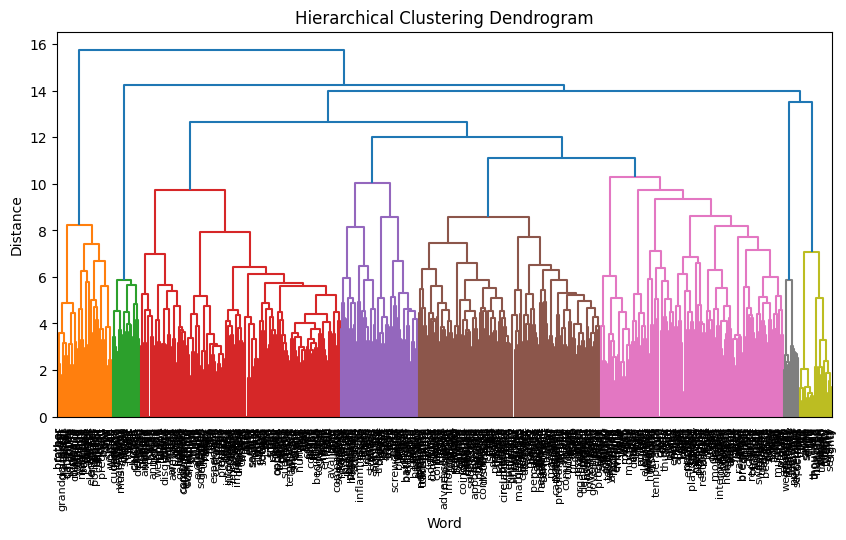

In [83]:
Z = linkage(word_vectors, method='ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Word')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=english_words,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()


In [87]:
num_clusters = 20
clusters = fcluster(Z, num_clusters, criterion='maxclust')

cluster_dict = {}
for word, cluster_label in zip(english_words, clusters):
    if cluster_label not in cluster_dict:
        cluster_dict[cluster_label] = []
    cluster_dict[cluster_label].append(word)

for cluster_label, words in cluster_dict.items():
    print(f"Cluster {cluster_label}: {words}")


Cluster 6: ['absence', 'almost', 'also', 'around', 'available', 'back', 'basic', 'beginning', 'big', 'break', 'busy', 'cheap', 'circle', 'clear', 'come', 'comparison', 'control', 'corner', 'correct', 'cover', 'difficult', 'direction', 'early', 'easy', 'empty', 'end', 'enough', 'every', 'face', 'far', 'first', 'flat', 'free', 'full', 'hand', 'heavy', 'help', 'high', 'important', 'impossible', 'inside', 'key', 'last', 'late', 'later', 'left', 'length', 'level', 'limit', 'line', 'look', 'low', 'make', 'many', 'move', 'near', 'need', 'new', 'number', 'offer', 'one', 'opposite', 'part', 'past', 'place', 'poor', 'popular', 'ready', 'relative', 'rich', 'second', 'short', 'side', 'since', 'singular', 'size', 'small', 'square', 'successful', 'suddenly', 'sure', 'table', 'temporary', 'together', 'triangle', 'twice', 'urgent', 'used', 'useful', 'watch', 'way', 'weak', 'well', 'without', 'wrong', 'second', 'fast', 'tall', 'slow', 'short', 'thin', 'big', 'small', 'alone', 'sensitivity', 'later', 'f